# Visualize an Initial Meta Temporal Network

In [13]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import teneto
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
from src.data import meta_ingest
from src.data import meta_graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

For this analysis, we will look at LCS data from the second split of 2017, and visualize the results as a temporal network with teneto.

In [2]:
subset = {"league":"LCS", "split":"2017-2", "start_date":"2000-01-01", "end_date":"2030-01-01", "patchno":"None"}
info, node, edge = meta_ingest.fetch_oracle_data(subset)

We can take a peek at the matches we've fetched by peeking at the info frame.

In [3]:
info.show()

+----------------+------+------+----------+----+-------+
|          gameid|league| split| game_date|week|patchno|
+----------------+------+------+----------+----+-------+
|6501cfa833ea575b|   LCS|2017-2|2017-06-17| 3.2|   7.11|
|b98e62c1bcc887e4|   LCS|2017-2|2017-06-02| 1.1|    7.1|
|d5fd95a1a08ea3e5|   LCS|2017-2|2017-06-16| 3.1|   7.11|
|cfd0e47c24bdd12d|   LCS|2017-2|2017-06-17| 3.2|   7.11|
|53b99bfe75ae566a|   LCS|2017-2|2017-07-02| 5.3|   7.12|
|4022de15e5cb3963|   LCS|2017-2|2017-06-04| 1.3|    7.1|
|662ba98b48b8473b|   LCS|2017-2|2017-06-23| 4.1|   7.12|
|b1b8f8c4ff5c58bb|   LCS|2017-2|2017-07-22| 7.2|   7.14|
|d5dd6083ae02f463|   LCS|2017-2|2017-06-25| 4.3|   7.12|
|9a20089e6f2d0143|   LCS|2017-2|2017-07-22| 7.2|   7.14|
|58652ccc25bd00a8|   LCS|2017-2|2017-07-28| 8.1|   7.14|
|e16475631dc9142e|   LCS|2017-2|2017-06-02| 1.1|    7.1|
|4ab73925b54ae5e8|   LCS|2017-2|2017-06-03| 1.2|    7.1|
|34a4dbf3eca0ea23|   LCS|2017-2|2017-06-18| 3.3|   7.11|
|2f68dedea7a6cec5|   LCS|2017-2

As we can see, all of the games are from the LCS 2017 Summer Split. Let's take a look at some of the edges.

In [4]:
edge.show()

+----------------+--------+------------+---------+
|          gameid| champ_a|     champ_b|link_type|
+----------------+--------+------------+---------+
|3f8005e537896b35|    Gnar|     LeBlanc|      ban|
|4a9b269abe5ea53a|Renekton|Aurelion Sol|      ban|
|4a9b269abe5ea53a|Renekton|      Kennen|      ban|
|4a9b269abe5ea53a|Renekton|     LeBlanc|      ban|
|4a9b269abe5ea53a|Renekton|        Gnar|      ban|
|4a9b269abe5ea53a|Renekton|      Thresh|      ban|
|4a9b269abe5ea53a| Rek'Sai|Aurelion Sol|      ban|
|4a9b269abe5ea53a| Rek'Sai|      Kennen|      ban|
|4a9b269abe5ea53a| Rek'Sai|     LeBlanc|      ban|
|4a9b269abe5ea53a| Rek'Sai|        Gnar|      ban|
|4a9b269abe5ea53a| Rek'Sai|      Thresh|      ban|
|4a9b269abe5ea53a|   Corki|Aurelion Sol|      ban|
|4a9b269abe5ea53a|   Corki|      Kennen|      ban|
|4a9b269abe5ea53a|   Corki|     LeBlanc|      ban|
|4a9b269abe5ea53a|   Corki|        Gnar|      ban|
|4a9b269abe5ea53a|   Corki|      Thresh|      ban|
|4a9b269abe5ea53a| Caitlyn|Aure

Although this is not in any particular order, we can see that Syndra was banned against Lulu in the 13a00890a7f68869 game. This isn't useful to look at itself, but we can transform this into a temporal network for visualization.

## Temporal Network

Lets try to make this a temporal network with __teneto__. For now, lets only look at champions that have been "picked with" each other, and we'll make this an unweighted, undirected network. 

In [7]:
t = meta_graph.make_teneto_graph(info, edge, link_type="pkw", weighted=False)

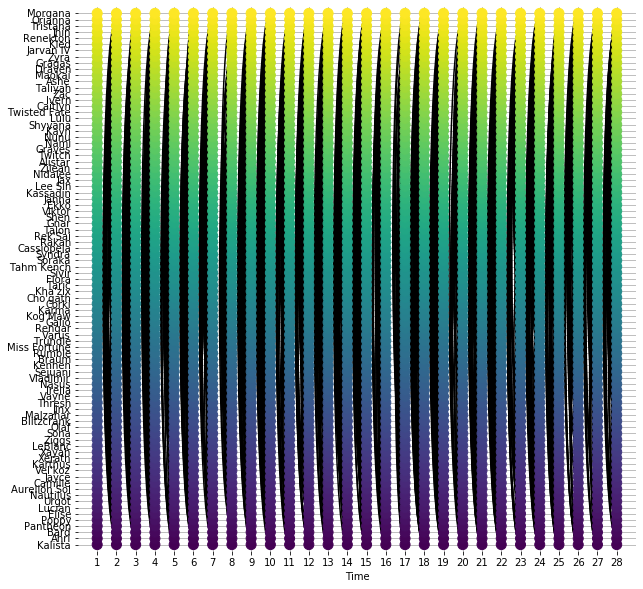

In [15]:
%matplotlib qt
t.plot("slice_plot")

A little messy, but at least we know it works!